In [2]:
%run setup.py
%config IPython.matplotlib.backend = "retina"

In [14]:
from lib.histdist import distance_to_edge, reduce_samples
def plot_model_diagram(diagram, xobs, yobs, xedge_obs, yedge_obs,
            xpdv, ypdv, xedge_pdv, yedge_pdv, filename):
    
    idx = reduce_samples(xobs.shape[0], xpdv.shape[0])
    xpdv, ypdv = xpdv[idx], ypdv[idx]
    
    # result plot
    fig = plt.figure(figsize=mnras_size(ratio=0.85))
    axes = fig.subplots(nrows=1, ncols=1, squeeze=False).reshape(-1)
    
    axes[0].scatter(xobs, yobs, s=0.1, color="red", label="Kepler", rasterized=True)
    axes[0].scatter(xpdv, ypdv, s=0.1, color="blue", label="Galaxia", rasterized=True)
    axes[0].plot(xedge_obs, yedge_obs, "k--", linewidth=1., label="Kepler edge", zorder=100)
    axes[0].plot(xedge_pdv, yedge_pdv, "k-", linewidth=1., label="Galaxia edge", zorder=100)
    axes[0].grid(True, zorder=-10)
    
    if diagram =="tnu":
        axes[0].axis([0, 130, 0.0, 10.0])
        axes[0].set_xlabel("$\\nu_{\\rm max}$ ($\\mu$Hz)")
        axes[0].set_ylabel("$\Delta\\nu$ ($\\mu$Hz)")
    else:
        axes[0].axis([0., 5., 5., 30.])
        axes[0].set_xlabel("$M$ ($M_{\odot}$)")
        axes[0].set_ylabel("$R$ ($R_{\odot}$)")       
    
    axes[0].legend()
    
    # plt.show()
    plt.tight_layout()
    plt.savefig(overleaf_path+filename)
    # plt.close()


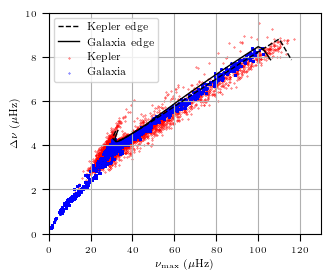

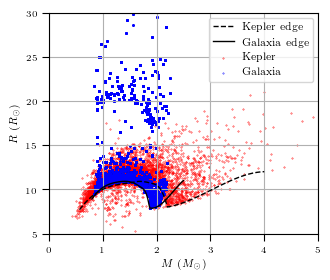

In [15]:
yu = np.load(work_path+'sample/heb/yu/yu18.npy',allow_pickle=True).tolist()
edge = np.load(work_path+'sample/heb/yu/tnu_edge_samples.npy')
tck_obs, tp_obs = np.load(work_path+"sample/heb/yu/nike_spline_tck.npy", allow_pickle=True)
xobs, yobs = yu["numax"], yu["dnu"]
xedge_obs, yedge_obs = edge[:,0], edge[:,1]

pdv = np.load(work_path+'sample/heb/padova/padova.npy',allow_pickle=True).tolist()
edge = np.load(work_path+'sample/heb/padova/tnu_edge_samples.npy')
tck_pdv, tp_pdv = np.load(work_path+'sample/heb/padova/nike_spline_tck.npy', allow_pickle=True)
xpdv, ypdv = pdv["numax"], pdv["dnu"]
xedge_pdv, yedge_pdv = edge[:,0], edge[:,1]


diagram = "tnu"
filename = "diagram_heb_tnu.pdf"
plot_model_diagram(diagram, xobs, yobs, xedge_obs, yedge_obs,
            xpdv, ypdv, xedge_pdv, yedge_pdv, filename)


yu = np.load(work_path+'sample/heb/yu/yu18.npy',allow_pickle=True).tolist()
edge = np.load(work_path+'sample/heb/yu/mr_edge_samples.npy')
tck_obs, tp_obs = np.load(work_path+"sample/heb/yu/mr_spline_tck.npy", allow_pickle=True)
xobs, yobs = yu["mass"], yu["radius"]
xedge_obs, yedge_obs = edge[:,0], edge[:,1]

pdv = np.load(work_path+'sample/heb/padova/padova.npy',allow_pickle=True).tolist()
edge = np.load(work_path+'sample/heb/padova/mr_edge_samples.npy')
tck_pdv, tp_pdv = np.load(work_path+'sample/heb/padova/mr_spline_tck.npy', allow_pickle=True)
xpdv, ypdv = pdv["mass"], pdv["radius"]
xedge_pdv, yedge_pdv = edge[:,0], edge[:,1]
diagram = "mr"
filename = "diagram_heb_mr.pdf"
plot_model_diagram(diagram, xobs, yobs, xedge_obs, yedge_obs,
            xpdv, ypdv, xedge_pdv, yedge_pdv, filename)


In [55]:
from lib.histdist import distance_to_bump, reduce_samples
def plot_model_diagram(variable, xobs, yobs, xbump_obs, ybump_obs,
            xpdv, ypdv, xbump_pdv, ybump_pdv, filename):
    
    # result plot
    fig = plt.figure(figsize=mnras_size(ratio=0.85))
    axes = fig.subplots(nrows=1, ncols=1, squeeze=False).reshape(-1)

    if variable == "dnu":
        axes[0].axis([5200, 4000, 15, 0.5])
        axes[0].set_xlabel("$T_{\\rm eff}$ (K)")
        axes[0].set_ylabel("$\Delta\\nu$ ($\\mu$Hz)")
        obsidx = (yobs>8) & (yobs<12)
        pdvidx = (ypdv>8) & (ypdv<12)
        ratio = np.sum(obsidx)/np.sum(pdvidx)
    elif variable == "numax":
        axes[0].axis([5200, 4000, 150, 5])
        axes[0].set_xlabel("$T_{\\rm eff}$ (K)")
        axes[0].set_ylabel("$\\nu_{\\rm max}$ ($\\mu$Hz)")
        obsidx = (yobs>80) & (yobs<120)
        pdvidx = (ypdv>80) & (ypdv<120)
        ratio = np.sum(obsidx)/np.sum(pdvidx)
    else:
        axes[0].axis([0.5, 2.5, 5., 20.])
        axes[0].set_xlabel("$M$ ($M_{\odot}$)")
        axes[0].set_ylabel("$R$ ($R_{\odot}$)")     
        obsidx = (yobs>8) & (yobs<12)
        pdvidx = (ypdv>8) & (ypdv<12)
        ratio = np.sum(obsidx)/np.sum(pdvidx)    
    idx = reduce_samples(xpdv.shape[0], int(xpdv.shape[0]*ratio))
    xpdv, ypdv = xpdv[idx], ypdv[idx]
    
  
    axes[0].scatter(xobs, yobs, s=0.1, color="red", label="Kepler", rasterized=True)
    axes[0].scatter(xpdv, ypdv, s=0.1, color="blue", label="Galaxia", rasterized=True)
    axes[0].plot(xbump_obs, ybump_obs, "k--", linewidth=1., label="Kepler bump", zorder=100)
    axes[0].plot(xbump_pdv, ybump_pdv, "k-", linewidth=1., label="Galaxia bump", zorder=100)
    axes[0].grid(True, zorder=-10)
      
    
    axes[0].legend()
    
    # plt.show()
    plt.tight_layout()
    plt.savefig(overleaf_path+filename)
    # plt.close()


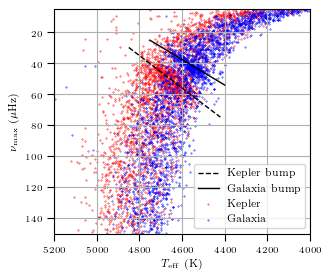

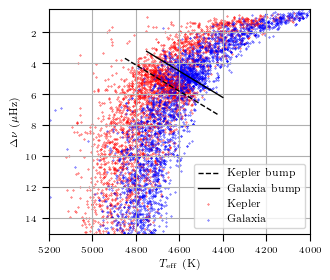

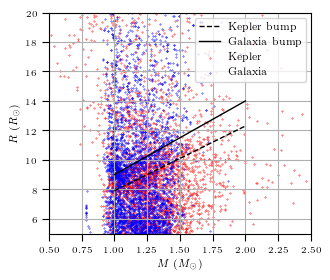

In [56]:
yu = np.load(work_path+'sample/rgb/yu/apk18.npy',allow_pickle=True).tolist()
bump = np.load(work_path+'sample/rgb/yu/numax_bump.npy')
xobs, yobs = yu["teff"], yu["numax"]
xbump_obs = np.linspace(4850, 4420, 100)
ybump_obs = bump[0]*xbump_obs+bump[1]

pdv = np.load(work_path+'sample/rgb/mist/mist.npy',allow_pickle=True).tolist()
bump = np.load(work_path+'sample/rgb/mist/numax_bump.npy')
xpdv, ypdv = pdv["teff"], pdv["numax"]
xbump_pdv = np.linspace(4750, 4400, 100)
ybump_pdv = bump[0]*xbump_pdv+bump[1]

variable = "numax"
filename = "diagram_rgb_numax.pdf"
plot_model_diagram(variable, xobs, yobs, xbump_obs, ybump_obs,
            xpdv, ypdv, xbump_pdv, ybump_pdv, filename)




yu = np.load(work_path+'sample/rgb/yu/apk18.npy',allow_pickle=True).tolist()
bump = np.load(work_path+'sample/rgb/yu/dnu_bump.npy')
xobs, yobs = yu["teff"], yu["dnu"]
xbump_obs = np.linspace(4850, 4420, 100)
ybump_obs = bump[0]*xbump_obs+bump[1]

pdv = np.load(work_path+'sample/rgb/mist/mist.npy',allow_pickle=True).tolist()
bump = np.load(work_path+'sample/rgb/mist/dnu_bump.npy')
xpdv, ypdv = pdv["teff"], pdv["dnu"]
xbump_pdv = np.linspace(4750, 4400, 100)
ybump_pdv = bump[0]*xbump_pdv+bump[1]

variable = "dnu"
filename = "diagram_rgb_dnu.pdf"
plot_model_diagram(variable, xobs, yobs, xbump_obs, ybump_obs,
            xpdv, ypdv, xbump_pdv, ybump_pdv, filename)



yu = np.load(work_path+'sample/rgb/yu/apk18.npy',allow_pickle=True).tolist()
bump = np.load(work_path+'sample/rgb/yu/mr_bump.npy')
xobs, yobs = yu["mass"], yu["radius"]
xbump_obs = np.linspace(1.0, 2.0, 10)
ybump_obs = bump[0]*xbump_obs+bump[1]

pdv = np.load(work_path+'sample/rgb/mist/mist.npy',allow_pickle=True).tolist()
bump = np.load(work_path+'sample/rgb/mist/mr_bump.npy')
xpdv, ypdv = pdv["mass"], pdv["radius"]
xbump_pdv = np.linspace(1.0, 2.0, 10)
ybump_pdv = bump[0]*xbump_pdv+bump[1]

variable = "mr"
filename = "diagram_rgb_mr.pdf"
plot_model_diagram(variable, xobs, yobs, xbump_obs, ybump_obs,
            xpdv, ypdv, xbump_pdv, ybump_pdv, filename)